<a href="https://colab.research.google.com/github/ViniDaher/Data-analysis-airbnb/blob/main/Projeto_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
#Installe o Dash
#!pip install dash

# importar os pacotes necessario
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  plotly.express  as  px


Vamos importar o Dataframe fornecido pelo Airbnb que você encontra nesse link [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/ViniDaher/Data-analysis-airbnb/main/dataframe-Airbnb/airbnb-buenos_aires.csv', index_col=['id'])
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60523,-58.41042,Entire home/apt,4974,3,1,2011-01-31,0.01,1,365,0,NaN
11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,6459,2,27,2021-04-03,0.33,1,176,1,NaN
12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59777,-58.39664,Private room,2683,1,20,2016-02-12,0.17,1,0,0,NaN
13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2814,1,1,2018-12-18,0.03,7,365,0,NaN
13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2814,1,0,NaN,NaN,7,365,0,NaN


## Análise dos Dados


**Dicionário das variáveis**

* `ID` - identificador único do Airbnb.
* `Name` - nome do anúncio.
* `Host_id` - identificador único do Host.
* `neighbourhood` - nome do bairro.
* `latitude` - coordenada da latitude da propriedade.
* `longitude` - coordenada da longitude da propriedade.
* `room_type` - informa o tipo de quarto que é oferecido.
* `price` - valor da diária em Pesos Argentinos.
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias



Verificamos que alguns dados estão vazios ou não são relevantes para a nossa análise. Então vamos fazer uma limpeza inicial. 

In [ ]:
# Limpando colunas que não precisaremos para a nossa análise.
df = df[['name','host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type',	'price',
    'minimum_nights',	'number_of_reviews',	'reviews_per_month',	'calculated_host_listings_count',	
    'availability_365']]

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print(f'Tamanho = {df.shape[0]}')
print(f'Variaveis = {df.shape[1]}')

# verificar as 5 primeiras entradas do Dataframe
df.head()

Tamanho = 17671
Variaveis = 12


,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,
6283,Casa Al Sur,13310,Balvanera,-34.60523,-58.41042,Entire home/apt,4974,3,1,0.01,1,365
11508,Amazing Luxurious Apt-Palermo Soho,42762,Palermo,-34.58184,-58.42415,Entire home/apt,6459,2,27,0.33,1,176
12463,Room in Recoleta - awesome location,48799,Recoleta,-34.59777,-58.39664,Private room,2683,1,20,0.17,1,0
13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Palermo,-34.59348,-58.42949,Private room,2814,1,1,0.03,7,365
13096,Standard Room in Palermo Viejo B&B,50994,Palermo,-34.59348,-58.42949,Private room,2814,1,0,NaN,7,365


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A importância de se trabalhar com dados de qualidade impacta diretamente no resultado da análise. Logo no início de um projeto, devemos verificar quais valores estão ausentes.

* A variável `reviews_per_month` tem **31,54%** dos valores nulos.
* A variável `name` tem **00,02%** dos valores nulos.






In [ ]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

reviews_per_month                 31.548865
name                               0.028295
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
host_id                            0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

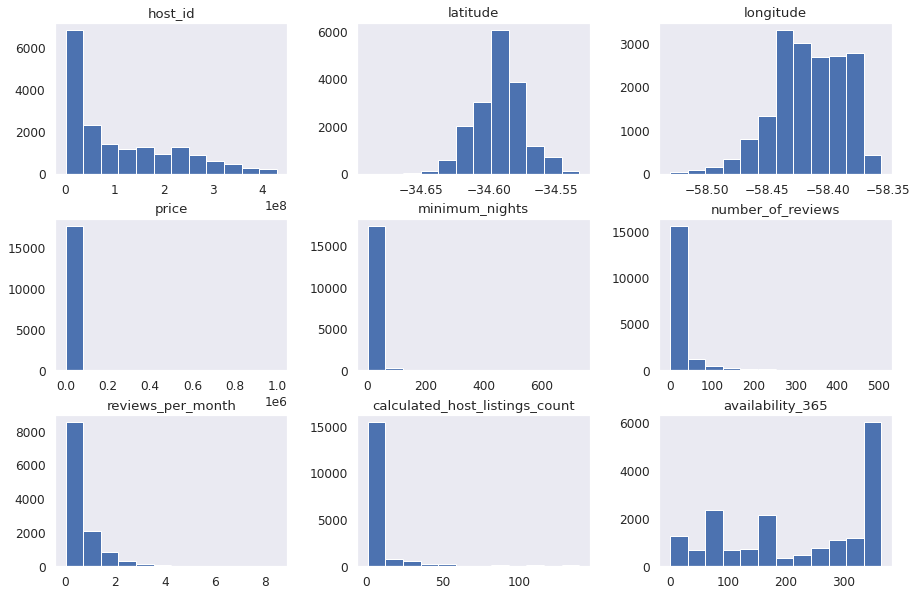

In [ ]:
# Plotar o histograma das variáveis numéricas
df.hist(bins=12, figsize=(15,10), grid=False);

No gráfico:
* price
* minimim_nights
* number_of_reviews
* calculated_host_listings_count

Podemos identificar que à discrepância nos dados com a sua maioria, se tratando de outliers. Usaremos o método `describe()` para auxiliar na detecção.

>Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade 

 

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,17671.000000,17671.000000,17671.000000,17671.000000
mean,6005.087318,7.322789,16.666403,7.732839
std,32768.515370,21.632532,34.481799,18.756130
min,0.000000,1.000000,0.000000,1.000000
25%,1987.000000,2.000000,0.000000,1.000000
50%,2985.000000,3.000000,3.000000,2.000000
75%,4969.000000,5.000000,17.000000,4.000000
max,997739.000000,730.000000,506.000000,139.000000


Com as informações acima podemos detectar vários outliers, então vamos utilizar uma sequência de passos a seguir:

* Calcular o IQR
* Definir limite inferiores
* Definir limite superiores
* Remover os outliers

In [ ]:
q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)

iqr_price = q3_price - q1_price

li_price = q1_price - 1.5 * iqr_price 
ls_price = q3_price + 1.5 * iqr_price

print(f'IQR da variável price = ',(iqr_price))
print(f'limite inferior =  {li_price}')
print(f'limite superior = {ls_price}')


IQR da variável price =  2982.0
limite inferior =  -2486.0
limite superior = 9442.0


>**IQR** é uma medida de dispersão baseada na mediana, que consegue contornar a presença destes outliers. Seu nome é variação interquartil, abreviada para IQR em inglês.

Não temos limites inferiores, mas mesmo assim teremos que tratar os valores <u>0</u> do nosso Dataframe. Em seguida vamos plotar um Boxplot para ver a diferença. 


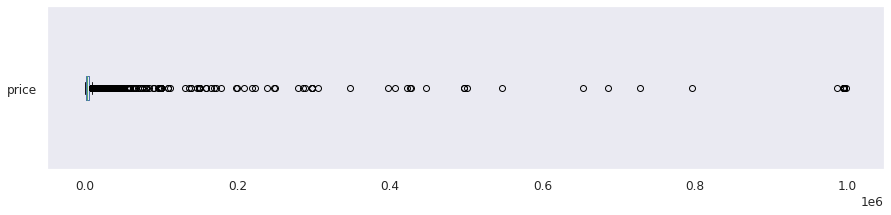

Entradas acima do Limite Superior: 1568 
Esses dados represetam: 8.87% 


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 3), grid=False)
plt.show()

print(f'Entradas acima do Limite Superior: {len(df[df.price > ls_price])} ')
print(f'Esses dados represetam: {len(df[df.price > ls_price]) / df.shape[0] * 100 :.2f}% ')

Faremos o mesmo com outras variáveis. 

In [ ]:
q1_nights = df.minimum_nights.quantile(0.25)
q3_nights = df.minimum_nights.quantile(0.75)

iqr_nights = q3_nights - q1_nights

li_nights = q1_nights - 1.5 * iqr_nights
ls_nights = q3_nights + 1.5 * iqr_nights

print(f'IQR da variável minimum_nights  = ',(iqr_nights))
print(f'limite inferior =  {li_nights}')
print(f'limite superior = {ls_nights}')

IQR da variável minimum_nights  =  3.0
limite inferior =  -2.5
limite superior = 9.5


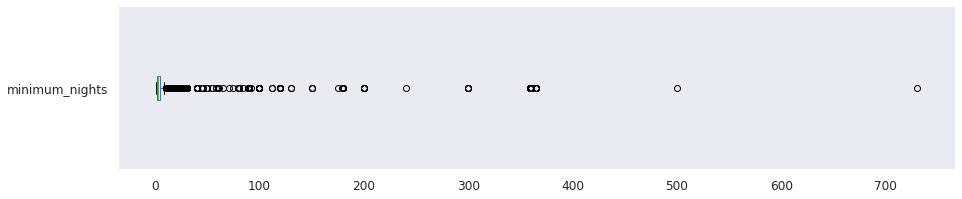

Entradas acima do Limite Superior: 2179 
Esses dados represetam: 12.33% 


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3), grid=False)
plt.show()

print(f'Entradas acima do Limite Superior: {len(df[df.minimum_nights > ls_nights])} ')
print(f'Esses dados representam: {len(df[df.minimum_nights > ls_nights]) / df.shape[0] * 100 :.2f}% ')

Agora vamos limpar os dados.

Para resolver o problema de preços zero, vamos colocar em consideração que o valor mínimo a se pagar em um quarto, seria 10 reais, que convertido fica aproximadamente 180 pesos argentinos.

In [ ]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > ls_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price < 180.0 ].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > ls_nights].index, axis=0, inplace=True)

print(f'Dados brutos: {df.shape[0]}')
print(f'Dados limpos: {df_clean.shape[0]}')

Dados brutos: 17671
Dados limpos: 14084


Usaremos o mesmo histograma para podermos distinguir da limpeza dos dados.  

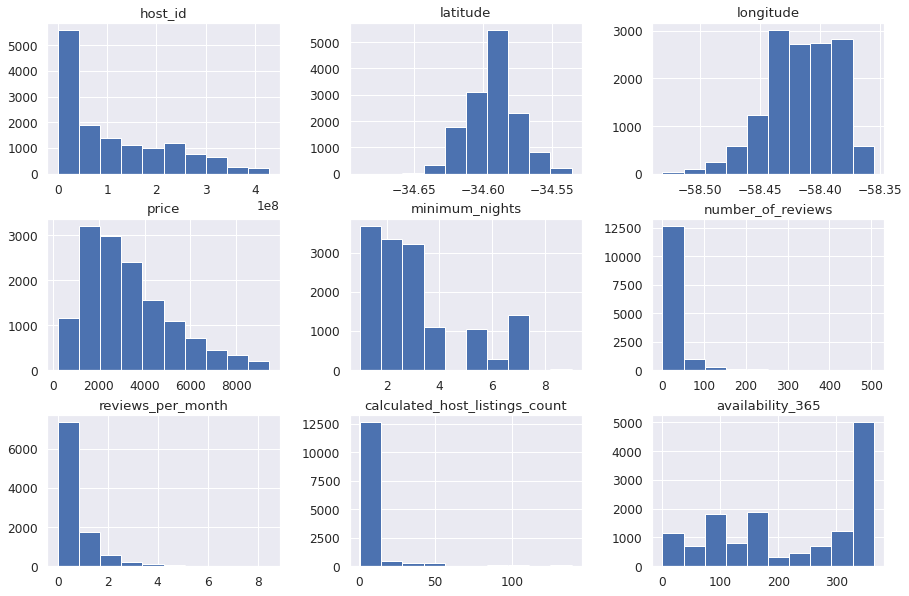

In [ ]:
df_clean.hist(figsize=(15,10));

### **Q4. Qual a média dos preços das diárias?**

In [ ]:
media = round(df_clean.price.mean())
print(f'A médias para de se alugar no airbnb é de \033[1m{media},00\033[0;0m Pesos Argentinos')

A médias para de se alugar no airbnb é de 3283,00 Pesos Argentinos


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,calculated_host_listings_count,availability_365
price,1.000000,0.040768,0.196704,0.083576
minimum_nights,0.040768,1.000000,0.030169,-0.016228
calculated_host_listings_count,0.196704,0.030169,1.000000,0.092555
availability_365,0.083576,-0.016228,0.092555,1.000000


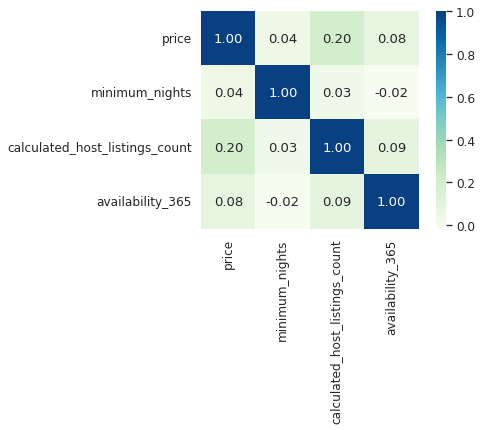

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='GnBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    10899
Private room        2745
Shared room          322
Hotel room           118
Name: room_type, dtype: int64

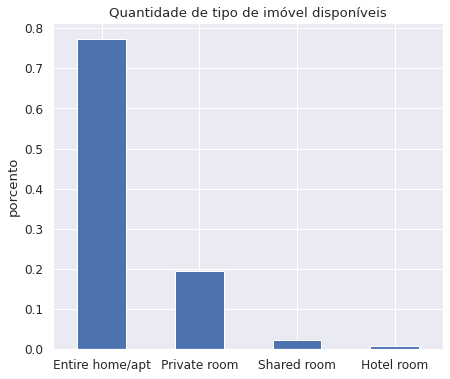

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
sns.set(font_scale=1.1)
(df_clean['room_type'].value_counts() / df_clean.shape[0]).plot(kind='bar' ,figsize=(7, 6), rot='0')
plt.title('Quantidade de tipo de imóvel disponíveis');
plt.ylabel('porcento');


### **Q6. Quantos Anúncios cada bairro possui?**

> Indented block





In [ ]:
#Definindo um dataset mais limpo.
df_clean2 = df_clean[['neighbourhood', 'price']]

#quantos anúncios cada localidade tem 
df_clean2.neighbourhood.value_counts()


Palermo              4262
Recoleta             2264
San Nicolas           986
Retiro                771
Balvanera             736
Belgrano              636
Monserrat             551
Almagro               546
San Telmo             463
Villa Crespo          453
Colegiales            269
Caballito             268
Nuñez                 252
Chacarita             207
Constitucion          186
Villa Urquiza         143
San Cristobal         106
Barracas              101
Puerto Madero          90
Saavedra               89
Boca                   89
Boedo                  79
Flores                 67
Villa Devoto           42
Coghlan                42
Parque Chacabuco       38
Villa Ortuzar          38
Villa Del Parque       35
Parque Patricios       33
Villa Santa Rita       25
Villa Pueyrredon       23
Floresta               21
Paternal               20
Villa Gral. Mitre      19
Parque Chas            18
Agronomia              17
Monte Castro           15
Velez Sarsfield        13
Nueva Pompey

Melhoraremos a análise eliminando aquelas localidades abaixo de 10 anúncios.

In [ ]:
#deletar os bairros abaixo de 10 anúncios.
df_clean2.drop(df_clean2[df_clean2.neighbourhood == 'Villa Riachuelo' ].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.neighbourhood == 'Villa Soldati' ].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.neighbourhood == 'Villa Lugano' ].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.neighbourhood == 'Villa Real' ].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.neighbourhood == 'Versalles' ].index, axis=0, inplace=True)
df_clean2.drop(df_clean2[df_clean2.neighbourhood == 'Parque Avellaneda' ].index, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy







### **Q7. Qual a localidade mais cara do dataset?**



Vamos agrupar por bairro utilizando o `groupby` e calcular a média dos preços cobrados por diária.

In [ ]:
#agrupar por localidade e calcular a média.
neighbourhood_mean = df_clean2.groupby(['neighbourhood',]).mean()

#colocar em ordem o dataframe.
neighbourhood_mean = neighbourhood_mean.sort_values(by=['price'])

In [ ]:
#posição x do gráfico.
largura = []
for i in neighbourhood_mean['price']:
   largura.append(round(i))

#posição y do gráfico.
altura = []
for i in range(0,42,1): 
   altura.append(i)

print(largura)
print(altura)

[1514, 1666, 1860, 1870, 1924, 1967, 2048, 2117, 2247, 2329, 2337, 2386, 2487, 2529, 2535, 2577, 2594, 2620, 2636, 2690, 2720, 2772, 2776, 2869, 2885, 2885, 2976, 3076, 3106, 3136, 3158, 3169, 3182, 3362, 3414, 3420, 3449, 3506, 3694, 3754, 3808, 6164]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


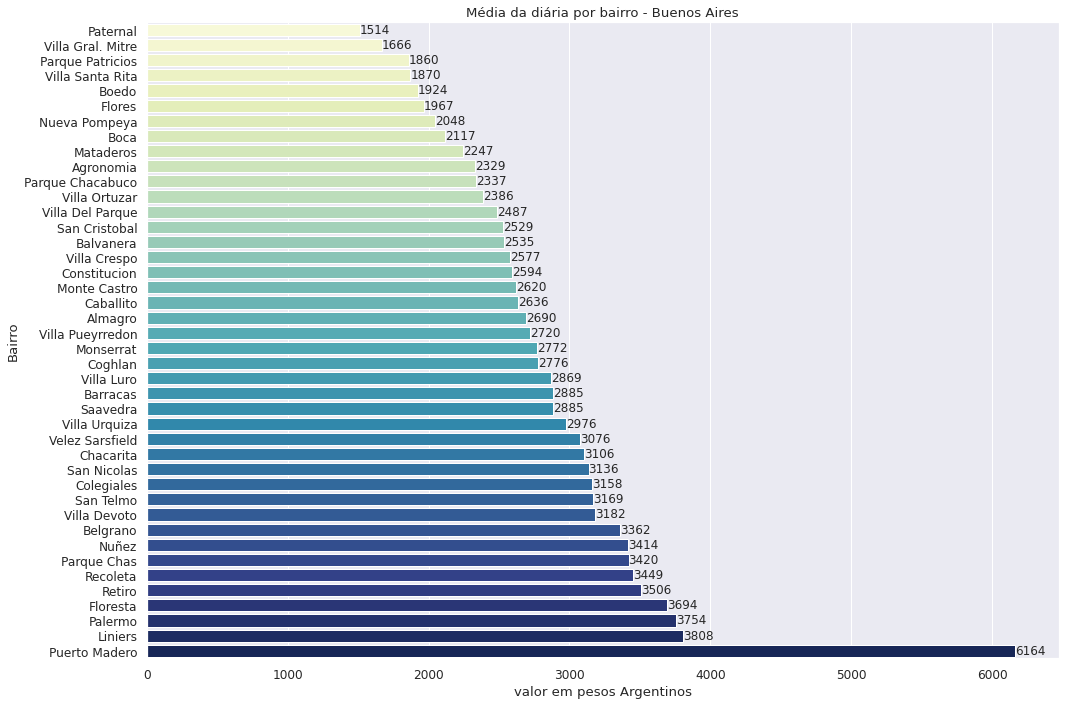

In [ ]:
#criando uma figure, axes, alterando tamanho.
fig, ax = plt.subplots(figsize=(15,10))

#criando o gráfico de barras
sns.barplot(x=neighbourhood_mean.price, y=neighbourhood_mean.index, ax=ax, data=neighbourhood_mean, palette='YlGnBu')

#Adicionando a médias nas barras.
for i in range(42):
   ax.text(x=largura[i]-0.2, y=altura[i]+0.2, s=str(largura[i]),   
           fontsize=12)

#Retirando as linhas(topo, direita, esquerda) 
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)

#título
plt.title('Média da diária por bairro - Buenos Aires')
plt.xlabel('valor em pesos Argentinos')
plt.ylabel('Bairro')

#otimizar espaço da figure
fig.tight_layout();

In [ ]:
# plotar os imóveis pela latitude-longitude
fig  =  px . scatter_mapbox ( df_clean ,  lat = "latitude" ,  lon = "longitude" ,  hover_name = "name" ,color=df_clean.neighbourhood,  hover_data = [ "price" ], 
                         zoom = 10 ,  height = 300 ) 
fig . update_layout ( mapbox_style = "open-street-map" ) 
fig. update_layout ( margin = { "r" : 0 , "t" : 0 , "l" : 0 , "b" : 0 }) 
fig . show ()

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.9331865947174096

In [ ]:

df_clean.minimum_nights.describe()

count    14084.000000
mean         2.933187
std          1.863101
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: minimum_nights, dtype: float64

A média se aproxima muito da mediana, então podemos dizer que há média de noites mínimas é de 3 noites.

## Conclusões


Podemos observar que Buenos Aires se mostrou uma ótima opção custo benefício para quem deseja viajar.

Vejamos abaixo o que descobrimos dessa cidade incrível.

   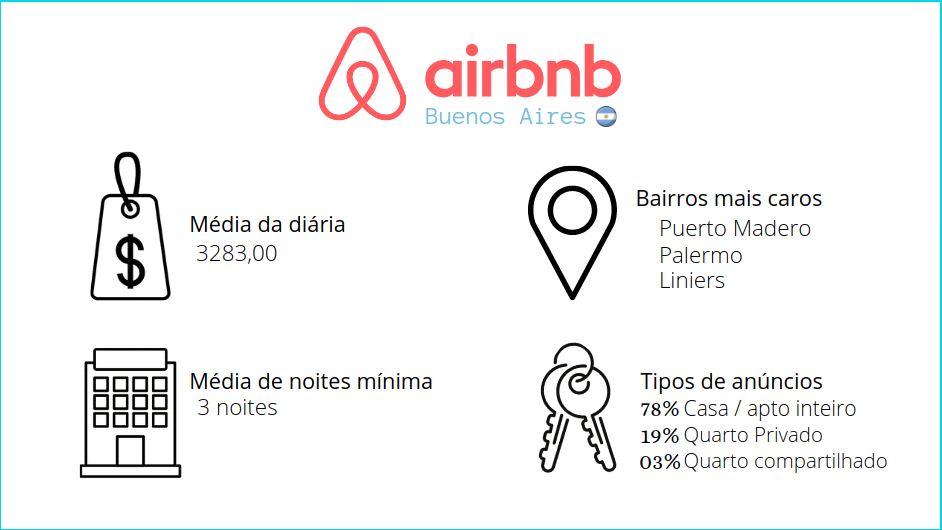